# Import
---

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data
---

In [2]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniformly distributed between -3 +3
Y = np.cos(2*X[:, 0]) + np.cos(3*X[:, 1])

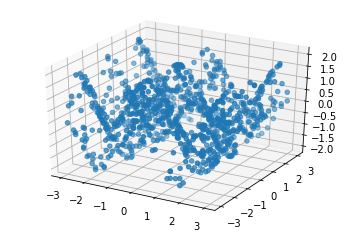

In [3]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

# Model
---

In [ ]:
# Build the model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
                                    tf.keras.layers.Dense(1)
])

opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')

# Train the model
r = model.fit(X, Y, 100, epochs=300)

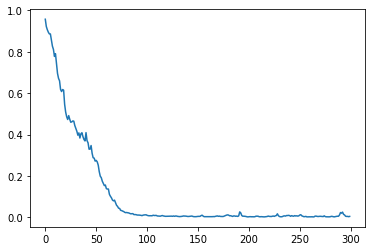

In [13]:
# Loss plot
plt.plot(r.history['loss'])
plt.show()

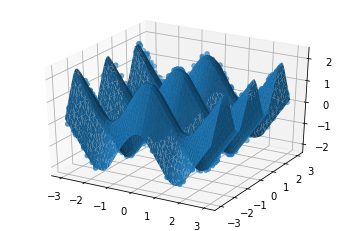

In [21]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2)
plt.show()